In [83]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from pmdarima.arima import auto_arima

In [84]:
df = pd.read_csv("D:/GitHub/us_employment.csv")


In [85]:
df

,Unnamed: 0,Month,Series_ID,Title,Employed
0,1,1939 jan,CEU0500000001,Total Private,25338.0
1,2,1939 fev,CEU0500000001,Total Private,25447.0
2,3,1939 mar,CEU0500000001,Total Private,25833.0
3,4,1939 abr,CEU0500000001,Total Private,25801.0
4,5,1939 mai,CEU0500000001,Total Private,26113.0
...,...,...,...,...,...
143407,143408,2019 mai,TEMPHELPN,"All Employees, Temporary Help Services",3009.5
143408,143409,2019 jun,TEMPHELPN,"All Employees, Temporary Help Services",3025.7
143409,143410,2019 jul,TEMPHELPN,"All Employees, Temporary Help Services",2965.9
143410,143411,2019 ago,TEMPHELPN,"All Employees, Temporary Help Services",3040.0


In [86]:
df.dtypes

Unnamed: 0      int64
Month          object
Series_ID      object
Title          object
Employed      float64
dtype: object

In [87]:
# Split the "Month" column into "Year" and "Month" columns
df[['Year', 'Month']] = df['Month'].str.split(' ', expand=True)



In [88]:
df

,Unnamed: 0,Month,Series_ID,Title,Employed,Year
0,1,jan,CEU0500000001,Total Private,25338.0,1939
1,2,fev,CEU0500000001,Total Private,25447.0,1939
2,3,mar,CEU0500000001,Total Private,25833.0,1939
3,4,abr,CEU0500000001,Total Private,25801.0,1939
4,5,mai,CEU0500000001,Total Private,26113.0,1939
...,...,...,...,...,...,...
143407,143408,mai,TEMPHELPN,"All Employees, Temporary Help Services",3009.5,2019
143408,143409,jun,TEMPHELPN,"All Employees, Temporary Help Services",3025.7,2019
143409,143410,jul,TEMPHELPN,"All Employees, Temporary Help Services",2965.9,2019
143410,143411,ago,TEMPHELPN,"All Employees, Temporary Help Services",3040.0,2019


In [89]:
# Convert "Year" and "Month" columns to integers and strings, respectively
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(str)

In [90]:
# Map the month abbreviations to the corresponding numerical representation
month_map = {
    'jan': '01',
    'fev': '02',
    'mar': '03',
    'abr': '04',
    'mai': '05',
    'jun': '06',
    'jul': '07',
    'ago': '08',
    'set': '09',
    'out': '10',
    'nov': '11',
    'dez': '12'
}

df['Month'] = df['Month'].map(month_map)

In [91]:
# Combine "Year" and "Month" columns to create the "Month" datetime column
df['Month'] = pd.to_datetime(df['Year'].astype(str) + df['Month'], format='%Y%m')


In [92]:
# Drop the 'Unnamed: 0' and 'Year' columns
df.drop(columns=['Unnamed: 0', 'Year'], inplace=True)

In [93]:
# Set the "Month" column as the DataFrame index
df.set_index('Month', inplace=True)

# Sort the DataFrame by the datetime index (optional but recommended)
df.sort_index(inplace=True)


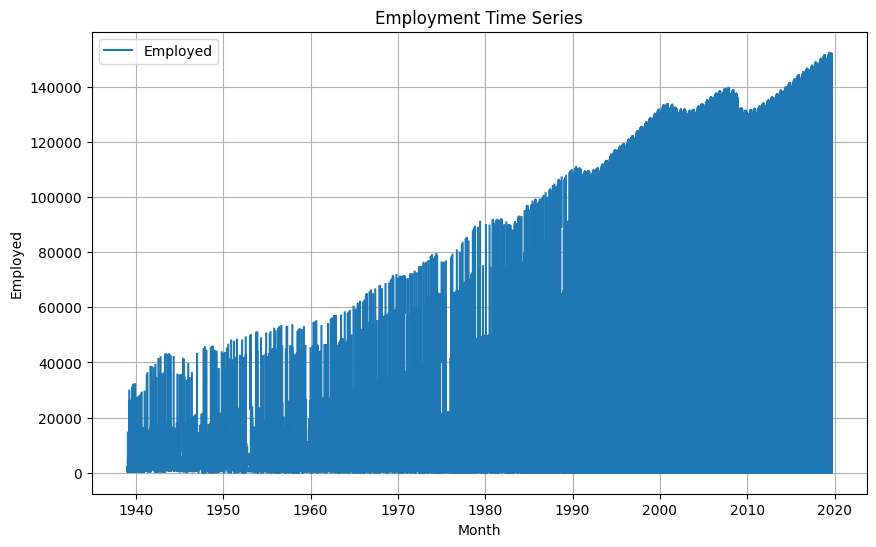

In [94]:
# Visualize the time series data (optional but useful for understanding the data)
plt.figure(figsize=(10, 6))
plt.plot(df.index, df['Employed'], label='Employed')
plt.xlabel('Month')
plt.ylabel('Employed')
plt.title('Employment Time Series')
plt.legend()
plt.grid(True)
plt.show()

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX
import numpy as np

# Read the CSV file into a Pandas DataFrame
df = pd.read_csv("D:/GitHub/us_employment.csv")

# Split the "Month" column into "Year" and "Month" columns
df[['Year', 'Month']] = df['Month'].str.split(' ', expand=True)

# Convert "Year" and "Month" columns to integers and strings, respectively
df['Year'] = df['Year'].astype(int)
df['Month'] = df['Month'].astype(str)

# Map the month abbreviations to the corresponding numerical representation
month_map = {
    'jan': '01',
    'fev': '02',
    'mar': '03',
    'abr': '04',
    'mai': '05',
    'jun': '06',
    'jul': '07',
    'ago': '08',
    'set': '09',
    'out': '10',
    'nov': '11',
    'dez': '12'
}

df['Month'] = df['Month'].map(month_map)

# Combine "Year" and "Month" columns to create the "Month" datetime column
df['Month'] = pd.to_datetime(df['Year'].astype(str) + df['Month'], format='%Y%m')

# Drop the 'Unnamed: 0' column
df.drop(columns=['Unnamed: 0'], inplace=True)

In [96]:
# Fill missing values with forward-fill imputation
df['Employed'] = df['Employed'].fillna(method='ffill')

In [97]:
# Set the "Month" column as the DataFrame index
df.set_index('Month', inplace=True)

# Sort the DataFrame by the datetime index (optional but recommended)
df.sort_index(inplace=True)

# Split the data into train and test sets
train = df[df['Year'] < 2000]
test = df[df['Year'] >= 2000]

In [98]:
# Find the appropriate ARIMA order using auto_arima
model = auto_arima(train['Employed'], seasonal=False, suppress_warnings=True, stepwise=True)

# Get the best ARIMA order from the auto_arima result
order = model.order

# Print the best ARIMA order
print("Best ARIMA Order (p, d, q):", order)

Best ARIMA Order (p, d, q): (5, 1, 0)


In [109]:
# Fit the ARIMA model on the train data with the best order
model = ARIMA(train['Employed'], order=(5, 1, 0))
results = model.fit()

c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [110]:
# Make predictions for the test data
predictions = results.forecast(steps=len(test))
predicted_values = predictions.values

c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\Rodrigo\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:836: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [111]:
from sklearn.metrics import mean_absolute_percentage_error

# Calculate MAPE for the ARIMA model
mape = mean_absolute_percentage_error(test['Employed'], predicted_values)
print("ARIMA MAPE:", mape)


ARIMA MAPE: 8.105420321988174
